<a href="https://colab.research.google.com/github/vovsiienko/IT496_Course_acitvities/blob/master/IT496_ViktoriiaO_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import requests
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

myAPIKey = '6e7abf1b234f34338f72bf5742f79107'

#Walmart
stock = 'WMT'

balanceStatements = requests.get (f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()
                                  
incomeStatements = requests.get (f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}").json()
                                 
print (balanceStatements[:5])

[{'date': '2022-01-31', 'symbol': 'WMT', 'reportedCurrency': 'USD', 'cik': '0000104169', 'fillingDate': '2022-03-18', 'acceptedDate': '2022-03-18 17:03:00', 'calendarYear': '2022', 'period': 'FY', 'cashAndCashEquivalents': 14760000000, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 14760000000, 'netReceivables': 8280000000, 'inventory': 56511000000, 'otherCurrentAssets': 1519000000, 'totalCurrentAssets': 81070000000, 'propertyPlantEquipmentNet': 112624000000, 'goodwill': 29014000000, 'intangibleAssets': 0.0, 'goodwillAndIntangibleAssets': 29014000000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 22152000000, 'totalNonCurrentAssets': 163790000000, 'otherAssets': 0.0, 'totalAssets': 244860000000, 'accountPayables': 55261000000, 'shortTermDebt': 5207000000, 'taxPayables': 851000000, 'deferredRevenue': 0.0, 'otherCurrentLiabilities': 26911000000, 'totalCurrentLiabilities': 87379000000, 'longTermDebt': 52116000000, 'deferredRevenueNonCurrent': 0.0, 'de

In [88]:
#the numbers from the two most recent years
fiveYearBalanceStatements = balanceStatements[:5]
fiveYearIncomeStatements = incomeStatements[:5]

In [89]:
#calculate profitability, assesTurnOver, and capitaStructure
#this is net income/sales - first fraction in DuPont analysis framework
profitability=[]
#this is net sales/assests - second fraction
assetTurnOver=[]
#this is assests/avg. shareholders equity  - third fraction
capitalStructure=[]
#the result of DuPontAnalysis
returnOnEquity = []
#dates
dates = []

#getting details
for i in range (0,5):
  #datesValue =fiveYearBalanceStatements[i]['date']
  #dates.append(datesValue)

  dates.append(fiveYearBalanceStatements[i]['date'])

  profitabilityValue=round((fiveYearIncomeStatements[i]['netIncome']/fiveYearIncomeStatements[i]['revenue']),2)
  profitability.append(profitabilityValue)
  
  assetTurnOverValue=round((fiveYearIncomeStatements[i]['revenue']/fiveYearBalanceStatements[i]['totalAssets']),2)
  assetTurnOver.append(assetTurnOverValue)

  capitalStructureValue=round((fiveYearBalanceStatements[i]['totalAssets']/fiveYearBalanceStatements[i]['totalStockholdersEquity']),2)
  capitalStructure.append(capitalStructureValue)

  returnOnEquityValue=round((profitabilityValue*assetTurnOverValue*capitalStructureValue),2)
  returnOnEquity.append(returnOnEquityValue)

print(returnOnEquity)


[0.14, 0.14, 0.21, 0.07, 0.13]


In [90]:
from datetime import date
from pandas.core.arrays import datetimes
DuPontDF = pd.DataFrame(columns=['date','profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity'])

DuPontDF['date']=dates
DuPontDF['profitability']=profitability
DuPontDF['assetTurnOver']=assetTurnOver
DuPontDF['capitalStructure']=capitalStructure
DuPontDF['returnOnEquity']=returnOnEquity

print(DuPontDF)

         date  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2022-01-31           0.02           2.34              2.94            0.14
1  2021-01-31           0.02           2.21              3.12            0.14
2  2020-01-31           0.03           2.22              3.17            0.21
3  2019-01-31           0.01           2.35              3.02            0.07
4  2018-01-31           0.02           2.45              2.63            0.13


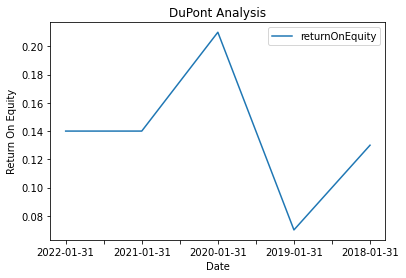

In [91]:
DuPontDF.plot(x='date', y='returnOnEquity', kind='line')
plt.title('DuPont Analysis')
plt.xlabel('Date')
plt.ylabel('Return On Equity')
plt.show()

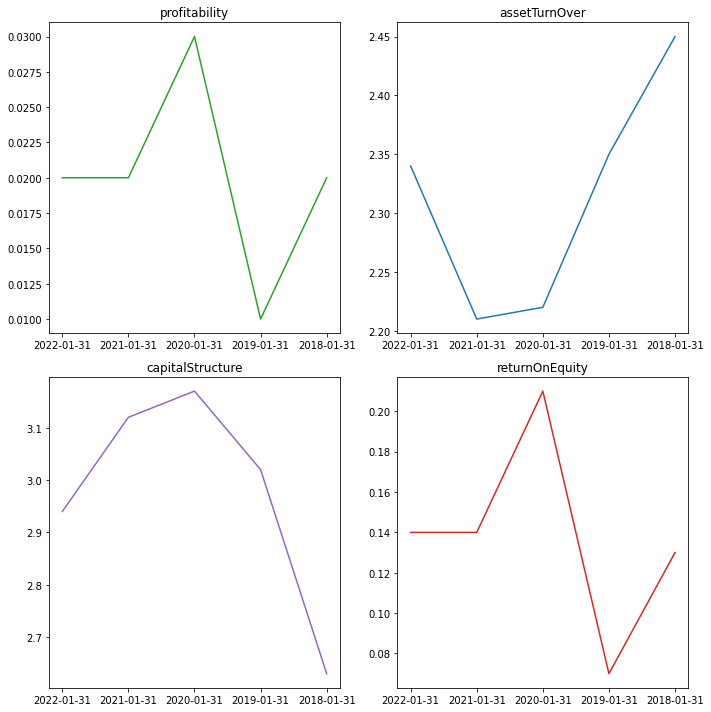

In [101]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
#set x for all them
x=DuPontDF['date']

#top left
axs[0,0].plot(x,DuPontDF['profitability'],'tab:green')
axs[0,0].set_title('profitability')

#top right
axs[0,1].plot(x,DuPontDF['assetTurnOver'])
axs[0,1].set_title('assetTurnOver')

#bottom left
axs[1,0].plot(x,DuPontDF['capitalStructure'], 'tab:purple')
axs[1,0].set_title('capitalStructure')

#bottom right
axs[1,1].plot(x,DuPontDF['returnOnEquity'], 'tab:red')
axs[1,1].set_title('returnOnEquity')

fig.tight_layout()

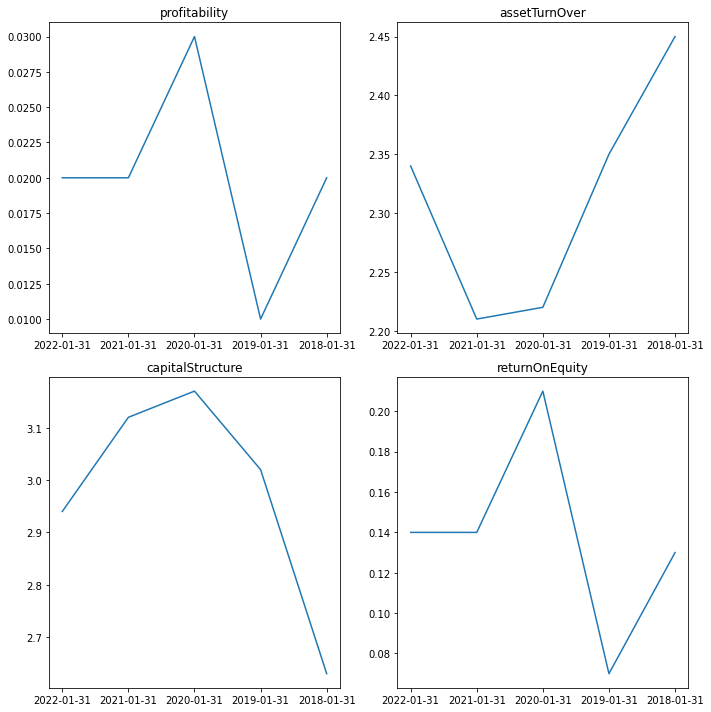

In [111]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
#set x for all them
x=DuPontDF['date']

#loop version
values=['profitability', 'assetTurnOver', 'capitalStructure', 'returnOnEquity']
for i in range (0,2):
  for j in range (0,2):
    valueIndex=i*2+j
    axs[i,j].plot (x, DuPontDF[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])

fig.tight_layout()
